# F1 Data Preprocessing and Analysis

This notebook demonstrates the data preprocessing pipeline for F1 race data. We'll go through:
1. Loading and examining raw data
2. Data cleaning and preprocessing
3. Feature engineering
4. Data validation
5. Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path
sys.path.append('..')
from src.data_pipeline.preprocessor import F1DataPreprocessor

# Set plotting style
# plt.style.use('seaborn')
sns.set_palette('husl')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## 1. Load Raw Data

First, let's load and examine the raw F1 data.

In [2]:
# Load raw data
raw_data_path = '../data/raw/seasons_2023_2024_data.csv'
df_raw = pd.read_csv(raw_data_path, low_memory=False)

print("Raw Data Shape:", df_raw.shape)
print("\nColumns:")
for col in df_raw.columns:
    print(f"- {col}: {df_raw[col].dtype}")

print("\nSample Data:")
df_raw.head()

Raw Data Shape: (55072, 71)

Columns:
- Time: object
- Driver: object
- DriverNumber: int64
- LapTime: object
- LapNumber: float64
- Stint: float64
- PitOutTime: object
- PitInTime: object
- Sector1Time: object
- Sector2Time: object
- Sector3Time: object
- Sector1SessionTime: object
- Sector2SessionTime: object
- Sector3SessionTime: object
- SpeedI1: float64
- SpeedI2: float64
- SpeedFL: float64
- SpeedST: float64
- IsPersonalBest: object
- Compound: object
- TyreLife: float64
- FreshTyre: bool
- Team: object
- LapStartTime: object
- LapStartDate: object
- TrackStatus: object
- Position: float64
- Deleted: bool
- DeletedReason: object
- FastF1Generated: bool
- IsAccurate: bool
- Event: object
- Year: int64
- Session: object
- AirTemp_Avg: float64
- TrackTemp_Avg: float64
- Humidity_Avg: float64
- WindSpeed_Avg: float64
- AirTemp_Min: float64
- AirTemp_Max: float64
- TrackTemp_Min: float64
- TrackTemp_Max: float64
- Rainfall: int64
- TrackCondition: int64
- AirTemp_Std: float64
- TrackT

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Event,Year,Session,AirTemp_Avg,TrackTemp_Avg,Humidity_Avg,WindSpeed_Avg,AirTemp_Min,AirTemp_Max,TrackTemp_Min,TrackTemp_Max,Rainfall,TrackCondition,AirTemp_Std,TrackTemp_Std,Humidity_Std,WindSpeed_Std,Weather_AirTemp,Weather_Humidity,Weather_Pressure,Weather_Rainfall,Weather_TrackTemp,Weather_WindDirection,Weather_WindSpeed,TrackStatusRaw,TrackStatusText,YellowFlag,SafetyCar,VirtualSafetyCar,RedFlag,Circuit_Lat,Circuit_Long,IsSoft,IsMedium,IsHard,IsIntermediate,IsWet,CompoundHardness,HasPitIn,HasPitOut
0,0 days 00:18:01.997000,VER,1,NaN,1.0,1.0,0 days 00:15:56.201000,NaN,NaN,0 days 00:00:44.778000,0 days 00:00:49.469000,NaN,0 days 00:17:12.544000,0 days 00:18:01.997000,283.0,229.0,239.0,223.0,False,SOFT,1.0,True,Red Bull Racing,0 days 00:15:56.201000,2023-07-08 14:00:56.204,2,NaN,False,NaN,False,False,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,2,YELLOW,1.0,0.0,0.0,0.0,1192.508301,4503.826172,True,False,False,False,False,1.0,False,True
1,0 days 00:19:35.532000,VER,1,0 days 00:01:33.535000,2.0,1.0,NaN,NaN,0 days 00:00:28.534000,0 days 00:00:36.657000,0 days 00:00:28.344000,0 days 00:18:30.531000,0 days 00:19:07.188000,0 days 00:19:35.532000,302.0,261.0,246.0,301.0,False,SOFT,2.0,True,Red Bull Racing,0 days 00:18:01.997000,2023-07-08 14:03:02.000,2,NaN,True,TRACK LIMITS AT TURN 15 LAP 3,False,True,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,2,YELLOW,1.0,0.0,0.0,0.0,1192.508301,4503.826172,True,False,False,False,False,1.0,False,False
2,0 days 00:21:07.677000,VER,1,0 days 00:01:32.145000,3.0,1.0,NaN,NaN,0 days 00:00:28.441000,0 days 00:00:36.572000,0 days 00:00:27.132000,0 days 00:20:03.973000,0 days 00:20:40.545000,0 days 00:21:07.677000,305.0,259.0,245.0,300.0,True,SOFT,3.0,True,Red Bull Racing,0 days 00:19:35.532000,2023-07-08 14:04:35.535,2,NaN,False,NaN,False,True,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,2,YELLOW,1.0,0.0,0.0,0.0,1192.508301,4503.826172,True,False,False,False,False,1.0,False,False
3,0 days 00:23:45.559000,VER,1,NaN,4.0,1.0,NaN,NaN,0 days 00:00:48.387000,0 days 00:01:09.690000,0 days 00:00:39.787000,0 days 00:21:56.213000,0 days 00:23:05.775000,0 days 00:23:45.696000,125.0,215.0,244.0,138.0,False,SOFT,4.0,True,Red Bull Racing,0 days 00:21:07.677000,2023-07-08 14:06:07.680,2,NaN,False,NaN,False,False,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,2,YELLOW,1.0,0.0,0.0,0.0,1192.508301,4503.826172,True,False,False,False,False,1.0,False,False
4,0 days 00:25:16.278000,VER,1,0 days 00:01:30.719000,5.0,1.0,NaN,NaN,0 days 00:00:28.109000,0 days 00:00:36.109000,0 days 00:00:26.501000,0 days 00:24:13.668000,0 days 00:24:49.777000,0 days 00:25:16.278000,304.0,261.0,247.0,300.0,True,SOFT,5.0,True,Red Bull Racing,0 days 00:23:45.559000,2023-07-08 14:08:45.562,2,NaN,False,NaN,False,True,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,2,YELLOW,1.0,0.0,0.0,0.0,1192.508301,4503.826172,True,False,False,False,False,1.0,False,False


## 2. Analyze Missing Values

Let's examine missing values in our dataset.

Columns with missing values:
                    Missing Values  Percentage
DeletedReason                54232   98.474724
PitOutTime                   50028   90.841081
PitInTime                    50019   90.824739
Position                     12525   22.742955
SpeedI1                       6778   12.307525
SpeedFL                       5107    9.273315
LapTime                       4467    8.111200
SpeedST                       4407    8.002252
Sector1SessionTime            3927    7.130665
Sector1Time                   3846    6.983585
Sector3SessionTime            1037    1.882990
Sector3Time                   1037    1.882990
SpeedI2                        289    0.524768
Sector2SessionTime             285    0.517504
Sector2Time                    285    0.517504
IsPersonalBest                  41    0.074448
LapStartDate                    41    0.074448


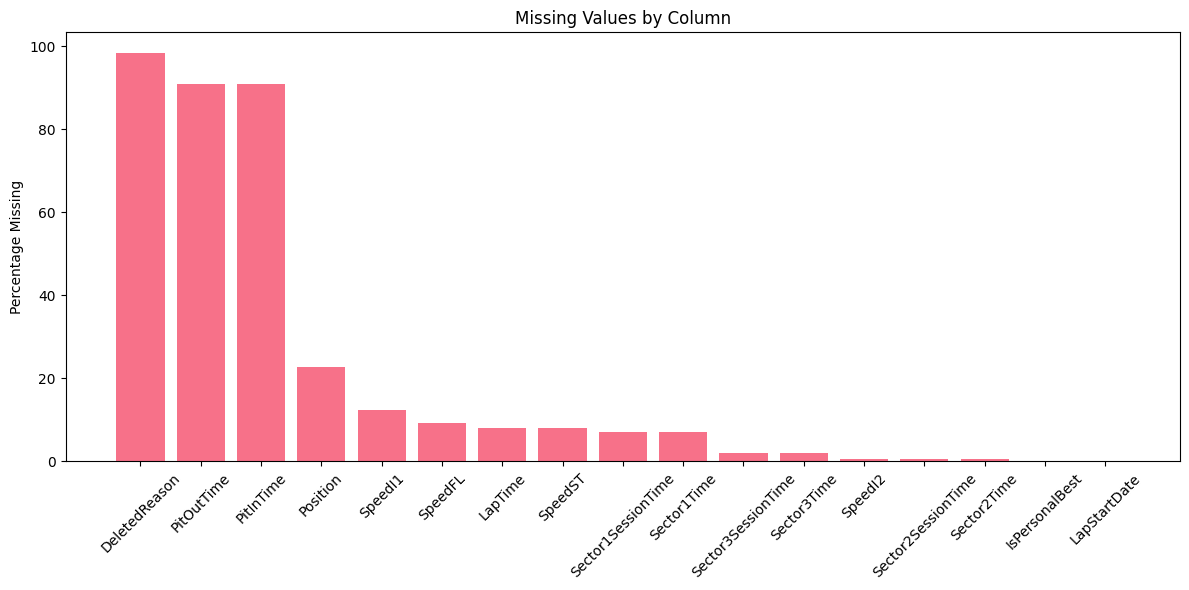

In [3]:
# Calculate missing value statistics
missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

# Plot missing values
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_df[missing_df['Percentage'] > 0])), 
        missing_df[missing_df['Percentage'] > 0]['Percentage'])
plt.xticks(range(len(missing_df[missing_df['Percentage'] > 0])), 
           missing_df[missing_df['Percentage'] > 0].index, rotation=45)
plt.title('Missing Values by Column')
plt.ylabel('Percentage Missing')
plt.tight_layout()

print("Columns with missing values:")
print(missing_df[missing_df['Missing Values'] > 0])

## 3. Preprocess Data

Now let's run our preprocessing pipeline.

In [4]:
# Initialize preprocessor
preprocessor = F1DataPreprocessor()

# Preprocess data
df_processed = preprocessor.preprocess_data(df_raw)

print("Processed Data Shape:", df_processed.shape)
print("\nProcessed Data Types:")
print(df_processed.dtypes)

INFO:src.data_pipeline.preprocessor:Starting data preprocessing...
INFO:src.data_pipeline.preprocessor:Dropped columns: DeletedReason
INFO:src.data_pipeline.preprocessor:Remaining columns: Time, Driver, DriverNumber, LapTime, LapNumber, Stint, PitOutTime, PitInTime, Sector1Time, Sector2Time, Sector3Time, Sector1SessionTime, Sector2SessionTime, Sector3SessionTime, SpeedI1, SpeedI2, SpeedFL, SpeedST, IsPersonalBest, Compound, TyreLife, FreshTyre, Team, LapStartTime, LapStartDate, TrackStatus, Position, Deleted, FastF1Generated, IsAccurate, Event, Year, Session, AirTemp_Avg, TrackTemp_Avg, Humidity_Avg, WindSpeed_Avg, AirTemp_Min, AirTemp_Max, TrackTemp_Min, TrackTemp_Max, Rainfall, TrackCondition, AirTemp_Std, TrackTemp_Std, Humidity_Std, WindSpeed_Std, Weather_AirTemp, Weather_Humidity, Weather_Pressure, Weather_Rainfall, Weather_TrackTemp, Weather_WindDirection, Weather_WindSpeed, TrackStatusRaw, TrackStatusText, YellowFlag, SafetyCar, VirtualSafetyCar, RedFlag, Circuit_Lat, Circuit_Lo

Processed Data Shape: (55072, 98)

Processed Data Types:
Time                timedelta64[ns]
Driver                     category
DriverNumber                  Int64
LapTime             timedelta64[ns]
LapNumber                     Int64
                         ...       
StintLength                   Int64
TempDelta                   float64
WetTrack                      Int64
GripLevel                   float64
WeatherStability            float64
Length: 98, dtype: object


## 4. Validate Processed Data

Let's check the quality of our processed data.

In [5]:
# Check remaining missing values
missing_processed = df_processed.isnull().sum()
print("Columns with missing values after processing:")
print(missing_processed[missing_processed > 0])

# Check value ranges for numerical columns
print("\nValue ranges for numerical columns:")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"{col}: {df_processed[col].min()} - {df_processed[col].max()}")

Columns with missing values after processing:
LapTime                  4471
PitOutTime              50028
PitInTime               50019
Sector1Time              3846
Sector2Time               285
Sector3Time              1037
Sector1SessionTime       3927
Sector2SessionTime        285
Sector3SessionTime       1037
SpeedI1                     7
SpeedI2                     7
SpeedFL                     8
SpeedST                     7
LapStartDate               41
Position                12476
LapTime_s                3937
Sector1Time_s            3101
Sector2Time_s             283
Sector3Time_s            1021
Sector1SessionTime_s     3927
Sector2SessionTime_s      285
Sector3SessionTime_s     1037
PitOutTime_s            50028
PitInTime_s             50019
LapTimeDelta             8554
PositionChange          13047
SpeedI1_Diff             1029
SpeedI2_Diff             1029
SpeedFL_Diff             1029
SpeedST_Diff             1029
PitStopDuration         54915
dtype: int64

Value rang

In [6]:
df_processed.head(5)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,FastF1Generated,IsAccurate,Event,Year,Session,AirTemp_Avg,TrackTemp_Avg,Humidity_Avg,WindSpeed_Avg,AirTemp_Min,AirTemp_Max,TrackTemp_Min,TrackTemp_Max,Rainfall,TrackCondition,AirTemp_Std,TrackTemp_Std,Humidity_Std,WindSpeed_Std,Weather_AirTemp,Weather_Humidity,Weather_Pressure,Weather_Rainfall,Weather_TrackTemp,Weather_WindDirection,Weather_WindSpeed,YellowFlag,SafetyCar,VirtualSafetyCar,RedFlag,Circuit_Lat,Circuit_Long,IsSoft,IsMedium,IsHard,IsIntermediate,IsWet,CompoundHardness,HasPitIn,HasPitOut,Time_s,LapTime_s,Sector1Time_s,Sector2Time_s,Sector3Time_s,Sector1SessionTime_s,Sector2SessionTime_s,Sector3SessionTime_s,LapStartTime_s,PitOutTime_s,PitInTime_s,LapTimeDelta,StintNumber,IsOutlap,IsInlap,SectorSum,PositionChange,TrackTempDelta,IsRain,SpeedI1_Diff,SpeedI2_Diff,SpeedFL_Diff,SpeedST_Diff,PitStopDuration,PitLap,StintLength,TempDelta,WetTrack,GripLevel,WeatherStability
0,0 days 00:18:01.997000,VER,1,NaT,1,1,0 days 00:15:56.201000,NaN,NaN,0 days 00:00:44.778000,0 days 00:00:49.469000,NaN,0 days 00:17:12.544000,0 days 00:18:01.997000,283.0,229.0,239.0,223.0,False,SOFT,0,True,Red Bull Racing,0 days 00:15:56.201000,2023-07-08 14:00:56.204,2,<NA>,False,False,False,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,True,False,False,False,1192.508301,4503.826172,True,False,False,False,False,1.0,False,True,1081.997,NaN,NaN,44.778,49.469,NaN,1032.544,1081.997,956.201,956.201,NaN,NaN,1,True,False,94.247,NaN,1.628723,True,NaN,NaN,NaN,NaN,NaN,True,44,1.628723,1,0.0,1.840767
1,0 days 00:19:35.532000,VER,1,0 days 00:01:33.535000,2,1,NaN,NaN,0 days 00:00:28.534000,0 days 00:00:36.657000,0 days 00:00:28.344000,0 days 00:18:30.531000,0 days 00:19:07.188000,0 days 00:19:35.532000,302.0,261.0,246.0,301.0,False,SOFT,1,True,Red Bull Racing,0 days 00:18:01.997000,2023-07-08 14:03:02.000,2,<NA>,True,False,True,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,True,False,False,False,1192.508301,4503.826172,True,False,False,False,False,1.0,False,False,1175.532,93.535,28.534,36.657,28.344,1110.531,1147.188,1175.532,1081.997,NaN,NaN,NaN,1,False,False,93.535,NaN,1.628723,True,19.0,32.0,7.0,78.0,NaN,False,44,1.628723,1,0.0,1.840767
2,0 days 00:21:07.677000,VER,1,0 days 00:01:32.145000,3,1,NaN,NaN,0 days 00:00:28.441000,0 days 00:00:36.572000,0 days 00:00:27.132000,0 days 00:20:03.973000,0 days 00:20:40.545000,0 days 00:21:07.677000,305.0,259.0,245.0,300.0,True,SOFT,2,True,Red Bull Racing,0 days 00:19:35.532000,2023-07-08 14:04:35.535,2,<NA>,False,False,True,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,212.723404,2.67234,True,False,False,False,1192.508301,4503.826172,True,False,False,False,False,1.0,False,False,1267.677,92.145,28.441,36.572,27.132,1203.973,1240.545,1267.677,1175.532,NaN,NaN,-1.39,1,False,False,92.145,NaN,1.628723,True,3.0,-2.0,-1.0,-1.0,NaN,False,44,1.628723,1,0.0,1.840767
3,0 days 00:23:45.559000,VER,1,NaT,4,1,NaN,NaN,0 days 00:00:48.387000,0 days 00:01:09.690000,0 days 00:00:39.787000,0 days 00:21:56.213000,0 days 00:23:05.775000,0 days 00:23:45.696000,125.0,215.0,244.0,138.0,False,SOFT,3,True,Red Bull Racing,0 days 00:21:07.677000,2023-07-08 14:06:07.680,2,<NA>,False,False,False,Pre-Season Testing,2023,Q,21.297872,22.926596,78.393617,2.67234,20.7,22.8,21.3,26.9,1,2,0.681393,1.700359,3.405303,0.524128,21.297872,78.393617,999.396809,1.0,22.926596,2

## 5. Exploratory Data Analysis

Let's visualize some key aspects of our processed data.

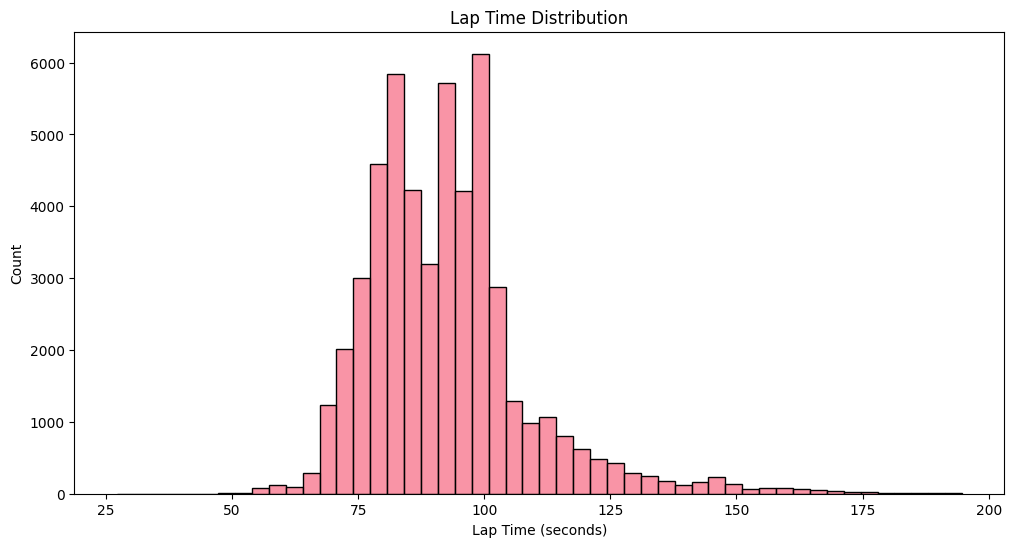

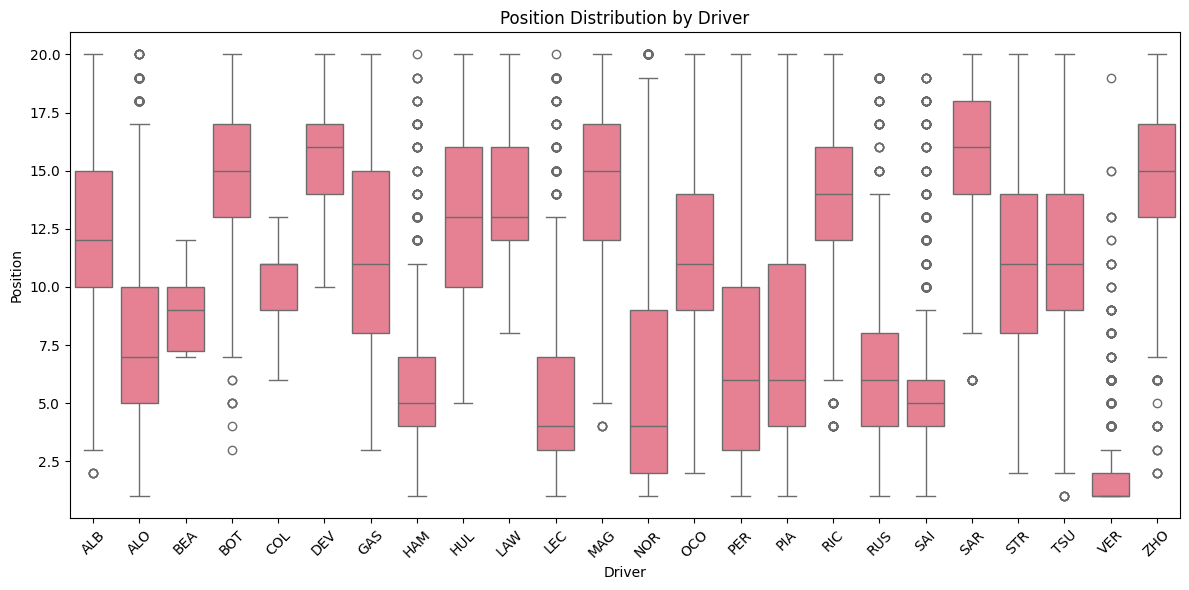

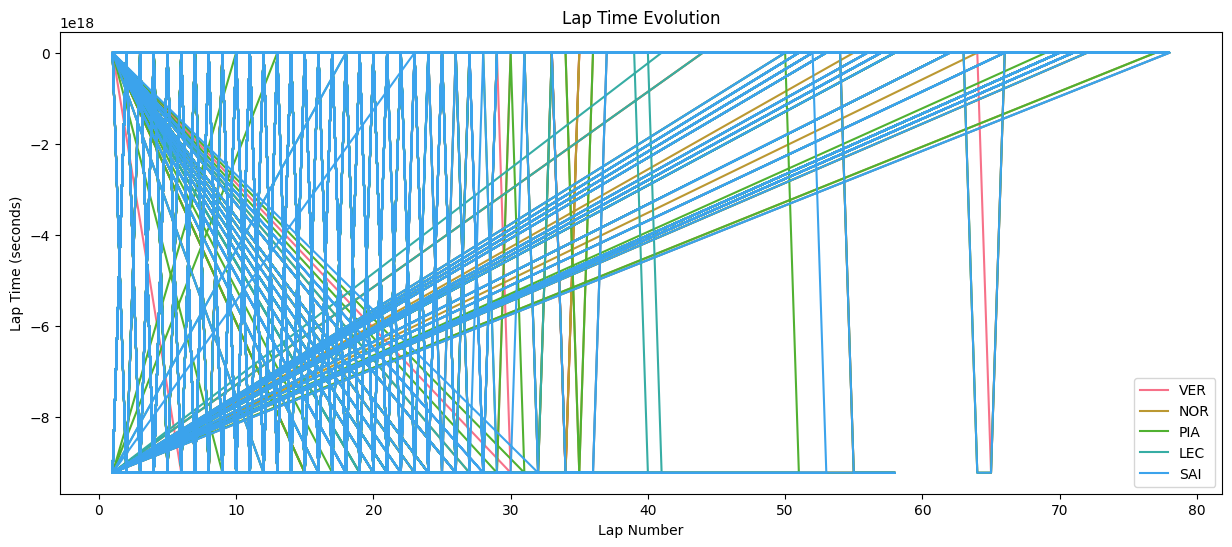

In [7]:
# 1. Lap Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_processed, x='LapTime_s', bins=50) # <-- Use the seconds column
plt.xlabel('Lap Time (seconds)')
plt.title('Lap Time Distribution')
plt.xlabel('Lap Time (seconds)')
plt.show()

# 2. Position Changes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_processed, x='Driver', y='Position')
plt.xticks(rotation=45)
plt.title('Position Distribution by Driver')
plt.tight_layout()
plt.show()

# 3. Lap Time Evolution
plt.figure(figsize=(15, 6))
for driver in df_processed['Driver'].unique()[:5]:  # Plot top 5 drivers
    driver_data = df_processed[df_processed['Driver'] == driver]
    plt.plot(driver_data['LapNumber'], driver_data['LapTime'], label=driver)
plt.title('Lap Time Evolution')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.legend()
plt.show()

## 6. Feature Analysis

Let's examine our derived features.

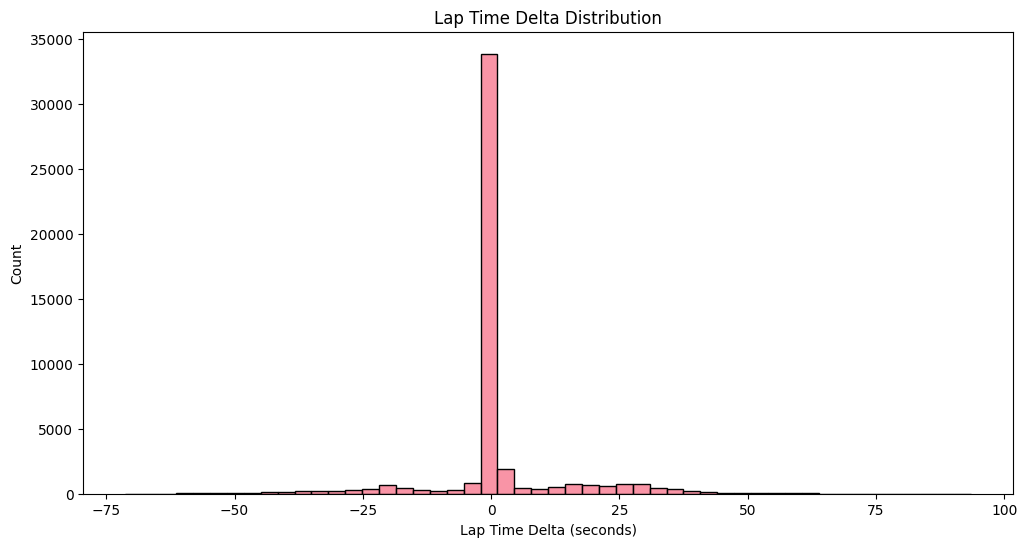

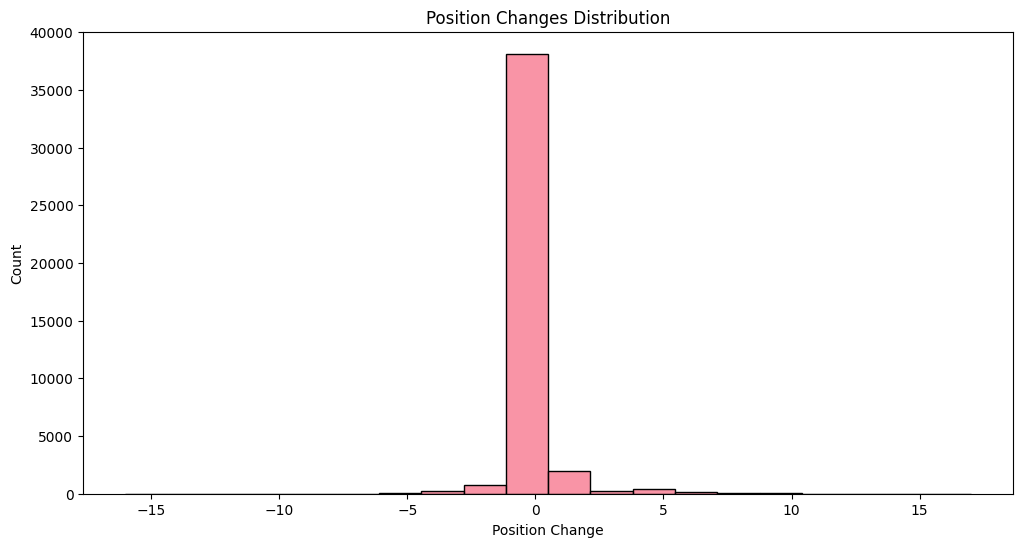

In [ ]:
# 1. Lap Time Delta Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df_processed, x='LapTimeDelta', bins=50)
plt.title('Lap Time Delta Distribution')
plt.xlabel('Lap Time Delta (seconds)')
plt.show()

# 2. Position Changes
plt.figure(figsize=(12, 6))
sns.histplot(data=df_processed, x='PositionChange', bins=20)
plt.title('Position Changes Distribution')
plt.xlabel('Position Change')
plt.show()

# 3. Sector Time Analysis
sector_cols = ['Sector1Time', 'Sector2Time', 'Sector3Time']
if all(col in df_processed.columns for col in sector_cols):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(sector_cols, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(data=df_processed, y=col)
        plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

## 7. Save Processed Data

Finally, let's save our processed dataset.

In [ ]:
# Save processed data
output_path = '../data/processed/f1_2023_cleaned.csv'
df_processed.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")

Processed data saved to: ../data/processed/f1_2023_cleaned.csv
